# Answer for cs229-hw1-q1
## Logisic regression and Newton's method

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [66]:
# read the file
df_x = pd.read_table('logistic_x.txt', sep='\s+', header=None)
df_y = pd.read_table('logistic_y.txt', header=None)

In [67]:
# change the columns' names
df_x.rename(columns={0 : 'x1', 1 : 'x2'}, inplace=True)
df_x['x0'] = 1 
df_x = df_x[['x0', 'x1', 'x2']]

df_y.rename(columns={0 : 'y'}, inplace=True)
df_y.y = df_y['y'].astype(int)

In [68]:
print(df_x.head(5))
print(df_y.head(5))

   x0        x1        x2
0   1  1.343250 -1.331148
1   1  1.820553 -0.634668
2   1  0.986321 -1.888576
3   1  1.944373 -1.635452
4   1  0.976734 -1.353315
   y
0 -1
1 -1
2 -1
3 -1
4 -1


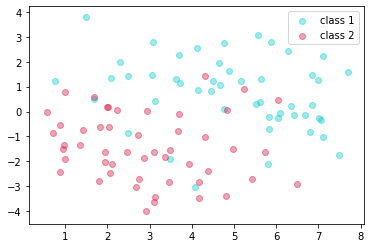

In [69]:
# Preview on the distribution of (x1, x2)
preview_fig = plt.figure()
ax_main = preview_fig.add_subplot(1, 1, 1)

df_x_class1 = df_x[df_y['y'] == 1]
df_x_class2 = df_x[df_y['y'] == -1]

ax_main.scatter(df_x_class1['x1'], df_x_class1['x2'], c='#00CED1', alpha=0.4, label='class 1')
ax_main.scatter(df_x_class2['x1'], df_x_class2['x2'], c='#DC143C', alpha=0.4, label='class 2')

ax_main.legend()

preview_fig.show()

#### Obviously, the dataset is not linearly seperable
#### use Newton's method to find the linear boundary of logistic regression



In [70]:
theta = Series(np.zeros(3), index=[0, 1, 2])
J_grad = Series(np.zeros(3), index=[0, 1, 2])
H_mat = DataFrame({0 : np.zeros(3), 1 : np.zeros(3), 2 : np.zeros(3)}, index=[0, 1, 2], columns=[0, 1, 2])

print(theta)
print(J_grad)
print(H_mat)

0    0.0
1    0.0
2    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
dtype: float64
     0    1    2
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0


In [71]:
# calculate J_grad and H_mat using df_x and df_y
print(df_x.iloc[0])
print(type(df_x.iloc[0]))

x0    1.000000
x1    1.343250
x2   -1.331148
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


In [72]:
# define the function to calculate sigmoid function
def sigmoid(theta, x):
    return 1 / (1 + np.exp(-np.dot(theta, x)))

sigmoid(theta, x=df_x.iloc[0])

0.5

In [73]:
print(J_grad)
print(H_mat)

# fill J_grad
for i in range(len(J_grad)):

    inner_sum = 0
    for k in range(len(df_x)):
        inner_sum += (sigmoid(theta, df_x.iloc[k]) - 1) * df_y.iloc[k] * df_x.iloc[k][i]
    
    J_grad[i] = inner_sum / len(df_x)

# fill H_mat
for i in range(len(H_mat)):
    for j in range(len(H_mat)):

        inner_sum = 0
        for k in range(len(df_x)):
            inner_sum += sigmoid(theta, df_x.iloc[k]) * (1 - sigmoid(theta, df_x.iloc[k])) * df_x.iloc[k][i] * df_x.iloc[k][j]
        H_mat[i][j] = inner_sum / len(df_x)

0    0.0
1    0.0
2    0.0
dtype: float64
     0    1    2
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0


In [74]:
print(J_grad)
print(H_mat)
H_mat_inv = DataFrame(np.linalg.inv(H_mat), index=range(3), columns=range(3))
abs(H_mat_inv.dot(J_grad))

0    0.005051
1   -0.481506
2   -0.554831
dtype: float64
          0         1         2
0  0.250000  0.980824 -0.087424
1  0.980824  4.769845 -0.181711
2 -0.087424 -0.181711  0.807403


0    1.509838
1    0.435097
2    0.621618
dtype: float64

In [75]:
# seems okay, and then update theta
# theta = [0, 0, 0] at first
theta = Series(np.zeros(3), index=[0, 1, 2])

while(True):

    old_theta = theta.copy()

    # update theta
    H_mat_inv = DataFrame(np.linalg.inv(H_mat), index=range(3), columns=range(3))
    theta = theta - H_mat_inv.dot(J_grad)
    print(theta)

    # made a stupid mistake
    if np.linalg.norm(abs(theta - old_theta), ord=2) < 0.5:
        print(theta)
        pass
    else:
        # update J_grad, H_mat and theta
        # J_grad
        for i in range(len(J_grad)):
            inner_sum = 0
            for k in range(len(df_x)):
                inner_sum += (sigmoid(theta, df_x.iloc[k]) - 1) * df_y.iloc[k] * df_x.iloc[k][i]   
            J_grad[i] = inner_sum / len(df_x)
        # H_mat
        for i in range(len(H_mat)):
            for j in range(len(H_mat)):

                inner_sum = 0
                for k in range(len(df_x)):
                    inner_sum += sigmoid(theta, df_x.iloc[k]) * (1 - sigmoid(theta, df_x.iloc[k])) * df_x.iloc[k][i] * df_x.iloc[k][j]
                H_mat[i][j] = inner_sum / len(df_x)

0   -1.509838
1    0.435097
2    0.621618
dtype: float64
0   -5.993400
1    1.351521
2    2.067533
dtype: float64
0   -85.595358
1    16.708786
2    29.188646
dtype: float64
0   -321137.099244
1     63087.422208
2    119346.560280
dtype: float64


LinAlgError: Singular matrix